**1. This problem involves the K-means clustering algorithm.**

**(a) Prove (12.18).**

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})² = 2 \sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})²
$$

Where $\bar{x}_{kj} = \frac{1}{|C_k|}\sum_{i \in C_k} x_{ij}$

For a fixed coordinate $j$, consider:

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} (x_{ij} - x_{i'j})^2.
$$

Expand the square:

$$
(x_{ij} - x_{i'j})^2 = x_{ij}^2 + x_{i'j}^2 - 2x_{ij}x_{i'j}.
$$

So:

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} (x_{ij} - x_{i'j})^2
= \frac{1}{|C_k|} \left( |C_k|\sum_{i \in C_k} x_{ij}^2 + |C_k|\sum_{i' \in C_k} x_{i'j}^2 - 2 \Big(\sum_{i \in C_k} x_{ij}\Big)\Big(\sum_{i' \in C_k} x_{i'j}\Big) \right).
$$

Notice both sums over $i$ and $i'$ are identical, so:

$$
= 2 \sum_{i \in C_k} x_{ij}^2 - \frac{2}{|C_k|} \Big(\sum_{i \in C_k} x_{ij}\Big)^2.
$$

The cluster mean for feature $j$ is:

$$
\bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i \in C_k} x_{ij}.
$$

So:

$$
\Big(\sum_{i \in C_k} x_{ij}\Big)^2 = |C_k|^2 \bar{x}_{kj}^2.
$$

Substitute back:

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} (x_{ij} - x_{i'j})^2
= 2 \left( \sum_{i \in C_k} x_{ij}^2 - |C_k|\bar{x}_{kj}^2 \right).
$$

Now look at the RHS for feature $j$:

$$
2 \sum_{i \in C_k} (x_{ij} - \bar{x}_{kj})^2.
$$

Expand:

$$
= 2 \sum_{i \in C_k} (x_{ij}^2 - 2x_{ij}\bar{x}_{kj} + \bar{x}_{kj}^2).
$$

$$
= 2 \left( \sum_{i \in C_k} x_{ij}^2 - 2\bar{x}_{kj}\sum_{i \in C_k} x_{ij} + |C_k|\bar{x}_{kj}^2 \right).
$$

But $\sum_{i \in C_k} x_{ij} = |C_k|\bar{x}_{kj}$. So:

$$
= 2 \left( \sum_{i \in C_k} x_{ij}^2 - 2|C_k|\bar{x}_{kj}^2 + |C_k|\bar{x}_{kj}^2 \right).
$$

$$
= 2 \left( \sum_{i \in C_k} x_{ij}^2 - |C_k|\bar{x}_{kj}^2 \right).
$$

Therefore, summing over all features $j=1,\dots,p$:

$$
\frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2
=
2 \sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2.
$$

**(b) On the basis of this identity, argue that the K-means clustering algorithm (Algorithm 12.2) decreases the objective (12.17) at each iteration.**

The K-means objective is

$$
W(C_1,\dots,C_K) \;=\; \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2. \tag{12.17}
$$

From (12.18), we know

$$
\frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2
= 2 \sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2.
$$

Thus, the objective is equivalently

$$
W(C_1,\dots,C_K) \;=\; 2 \sum_{k=1}^K \sum_{i \in C_k} \|x_i - \bar{x}_k\|^2,
$$

where $\bar{x}_k$ is the mean vector of cluster $C_k$.

For fixed assignments $C_k$, the objective reduces to

$$
\sum_{i \in C_k} \|x_i - \mu\|^2
$$

for each cluster $k$, minimized over $\mu$. From least squares, the minimizer is exactly the mean $\mu = \bar{x}_k$. Hence recomputing centroids strictly decreases or leaves unchanged the objective.

For fixed centroids, each point is assigned to the cluster with the closest centroid in Euclidean distance. That is, each point chooses $k$ to minimize $\|x_i - \bar{x}_k\|^2$. Since the objective is the sum of these squared distances, reassigning cannot increase the objective.


Because of identity (12.18), we know that minimizing average pairwise distances is the same as minimizing squared distances to cluster means. Therefore, each iteration of Algorithm 12.2 either decreases or leaves unchanged the objective (12.17). Since the objective is bounded below by 0, the algorithm converges after finitely many iterations to a local minimum.

2. Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by
$$
\begin{bmatrix}
    & 0.3 & 0.4 & 0.7\\
0.3 &     & 0.5 & 0.8\\
0.4 & 0.5 &     & 0.45\\
0.7 & 0.8 & 0.45 
\end{bmatrix} 
$$

**For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.**

**(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.**


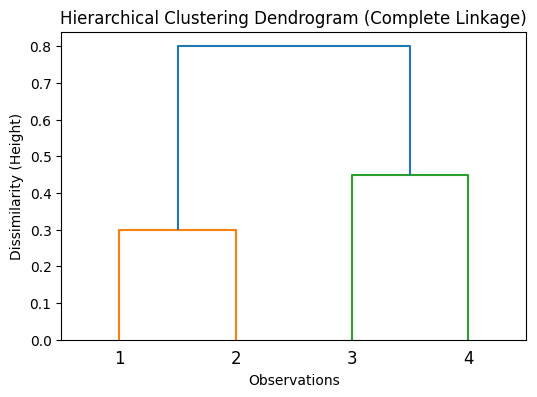

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

dissimilarities = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]

Z = linkage(dissimilarities, method="complete")

plt.figure(figsize=(6, 4))
dendrogram(Z, labels=[1, 2, 3, 4])
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity (Height)")
plt.show()

**(b) Repeat (a), this time using single linkage clustering.**

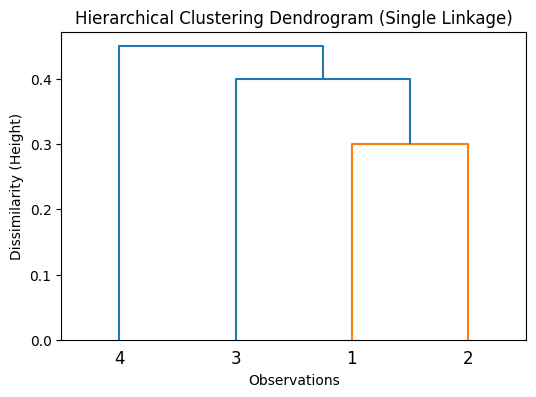

In [4]:
dissimilarities = [0.3, 0.4, 0.7, 0.5, 0.8, 0.45]

Z_single = linkage(dissimilarities, method="single")

plt.figure(figsize=(6, 4))
dendrogram(Z_single, labels=[1, 2, 3, 4])
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity (Height)")
plt.show()

**(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?**

If we cut the dendrogram so that exactly 2 clusters remain, we cut it just below height 0.8 (but above 0.45).

That yields the two clusters:
- Cluster 1: {1, 2}
- Cluster 2: {3, 4}

**(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?**

If we cut the dendrogram such that two clusters result, the only place to cut is between 0.4 and 0.45.

That yields:
- Cluster 1: {1, 2, 3}
- Cluster 2: {4}

**3. In this problem, you will perform K-means clustering manually, with $K = 2$, on a small example with $n = 6$ observations and $p = 2$ features. The observations are as follows.**

| Obs. | X1 | X2 |
| ---- | -- | -- |
| 1    | 1  | 4  |
| 2    | 1  | 3  |
| 3    | 0  | 4  |
| 4    | 5  | 1  |
| 5    | 6  | 2  |
| 6    | 4  | 0  |

**(a) Plot the observations.**

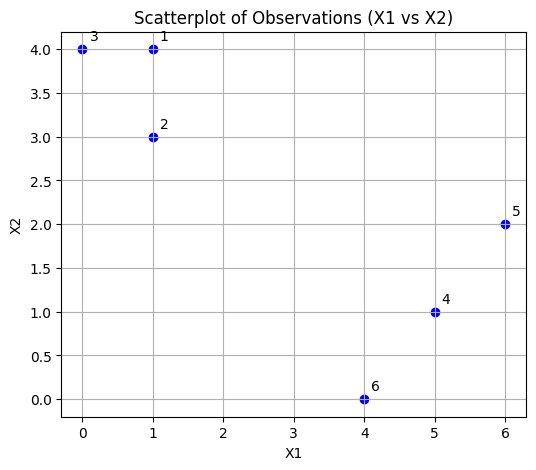

In [5]:
obs = [1, 2, 3, 4, 5, 6]
X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 1, 2, 0]

plt.figure(figsize=(6, 5))
plt.scatter(X1, X2, color="blue")

for i, (x, y) in enumerate(zip(X1, X2), start=1):
    plt.text(x + 0.1, y + 0.1, str(i))

plt.title("Scatterplot of Observations (X1 vs X2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


**(b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.**

[1 2 2 1 2 2]


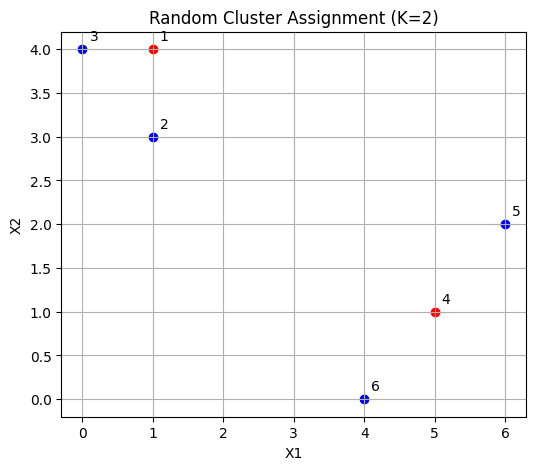

In [6]:
import numpy as np

np.random.seed(0)
labels = np.random.choice([1, 2], size=6)
print(labels)

plt.figure(figsize=(6, 5))
for i, (x, y, lbl) in enumerate(zip(X1, X2, labels), start=1):
    plt.scatter(x, y, c='red' if lbl == 1 else 'blue')
    plt.text(x + 0.1, y + 0.1, str(i))

plt.title("Random Cluster Assignment (K=2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

**(c) Compute the centroid for each cluster.**

Cluster labels = **[1, 2, 2, 1, 2, 2]**

**Cluster 1:** Obs {1, 4}

* Obs 1 = (1, 4)
* Obs 4 = (5, 1)
* Centroid = $\big(\tfrac{1+5}{2}, \tfrac{4+1}{2}\big) = (3.0, 2.5)$

**Cluster 2:** Obs {2, 3, 5, 6}

* Obs 2 = (1, 3)
* Obs 3 = (0, 4)
* Obs 5 = (6, 2)
* Obs 6 = (4, 0)
* Centroid = $\big(\tfrac{1+0+6+4}{4}, \tfrac{3+4+2+0}{4}\big)$
  \= $(\tfrac{11}{4}, \tfrac{9}{4}) = (2.75, 2.25)$


**(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.**

Let's go **step by step** for part (d). You already have the centroids:

* **Cluster 1 centroid:** $C_1 = (3.0, 2.5)$
* **Cluster 2 centroid:** $C_2 = (2.75, 2.25)$

We will compute the **Euclidean distance** from each observation to both centroids and assign it to the closest cluster. The Euclidean distance formula is:

$$
d = \sqrt{(X1 - C_x)^2 + (X2 - C_y)^2}
$$

1. Obs 1: (1, 4)

$$
d_1 = \sqrt{(1-3)^2 + (4-2.5)^2} = \sqrt{(-2)^2 + (1.5)^2} = \sqrt{4 + 2.25} = \sqrt{6.25} = 2.5
$$

$$
d_2 = \sqrt{(1-2.75)^2 + (4-2.25)^2} = \sqrt{(-1.75)^2 + (1.75)^2} = \sqrt{3.0625 + 3.0625} = \sqrt{6.125} \approx 2.475
$$

→ **Closest to Cluster 2**

2. Obs 2: (1, 3)

$$
d_1 = \sqrt{(1-3)^2 + (3-2.5)^2} = \sqrt{(-2)^2 + (0.5)^2} = \sqrt{4 + 0.25} = \sqrt{4.25} \approx 2.062
$$

$$
d_2 = \sqrt{(1-2.75)^2 + (3-2.25)^2} = \sqrt{(-1.75)^2 + (0.75)^2} = \sqrt{3.0625 + 0.5625} = \sqrt{3.625} \approx 1.904
$$

→ **Closest to Cluster 2**

3. Obs 3: (0, 4)

$$
d_1 = \sqrt{(0-3)^2 + (4-2.5)^2} = \sqrt{(-3)^2 + (1.5)^2} = \sqrt{9 + 2.25} = \sqrt{11.25} \approx 3.354
$$

$$
d_2 = \sqrt{(0-2.75)^2 + (4-2.25)^2} = \sqrt{(-2.75)^2 + (1.75)^2} = \sqrt{7.5625 + 3.0625} = \sqrt{10.625} \approx 3.26
$$

→ **Closest to Cluster 2**

4. Obs 4: (5, 1)

$$
d_1 = \sqrt{(5-3)^2 + (1-2.5)^2} = \sqrt{(2)^2 + (-1.5)^2} = \sqrt{4 + 2.25} = \sqrt{6.25} = 2.5
$$

$$
d_2 = \sqrt{(5-2.75)^2 + (1-2.25)^2} = \sqrt{(2.25)^2 + (-1.25)^2} = \sqrt{5.0625 + 1.5625} = \sqrt{6.625} \approx 2.574
$$

→ **Closest to Cluster 1**

5. Obs 5: (6, 2)

$$
d_1 = \sqrt{(6-3)^2 + (2-2.5)^2} = \sqrt{3^2 + (-0.5)^2} = \sqrt{9 + 0.25} = \sqrt{9.25} \approx 3.041
$$

$$
d_2 = \sqrt{(6-2.75)^2 + (2-2.25)^2} = \sqrt{3.25^2 + (-0.25)^2} = \sqrt{10.5625 + 0.0625} = \sqrt{10.625} \approx 3.26
$$

→ **Closest to Cluster 1**

6. Obs 6: (4, 0)

$$
d_1 = \sqrt{(4-3)^2 + (0-2.5)^2} = \sqrt{1^2 + (-2.5)^2} = \sqrt{1 + 6.25} = \sqrt{7.25} \approx 2.692
$$

$$
d_2 = \sqrt{(4-2.75)^2 + (0-2.25)^2} = \sqrt{1.25^2 + (-2.25)^2} = \sqrt{1.5625 + 5.0625} = \sqrt{6.625} \approx 2.574
$$

→ **Closest to Cluster 2**

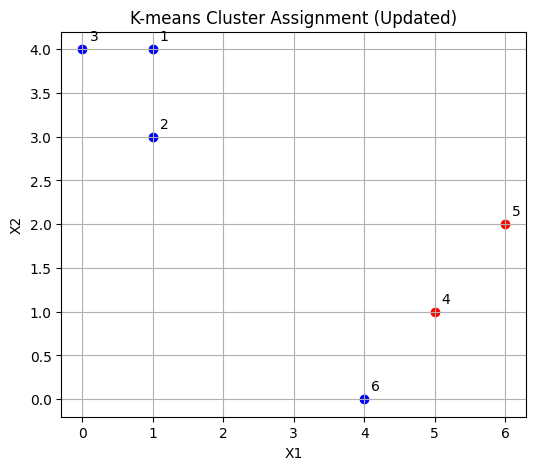

In [7]:
import matplotlib.pyplot as plt

X1 = [1, 1, 0, 5, 6, 4]
X2 = [4, 3, 4, 1, 2, 0]
new_labels = [2, 2, 2, 1, 1, 2]

plt.figure(figsize=(6, 5))
for i, (x, y, lbl) in enumerate(zip(X1, X2, new_labels), start=1):
    plt.scatter(x, y, c='red' if lbl == 1 else 'blue')
    plt.text(x + 0.1, y + 0.1, str(i))

plt.title("K-means Cluster Assignment (Updated)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

**(e) Repeat (c) and (d) until the answers obtained stop changing.**

**Cluster 1:** Obs {4, 5} → points (5,1) and (6,2)

$$
C_1 = \left( \frac{5+6}{2}, \frac{1+2}{2} \right) = (5.5, 1.5)
$$

**Cluster 2:** Obs {1,2,3,6} → points (1,4), (1,3), (0,4), (4,0)

$$
C_2 = \left( \frac{1+1+0+4}{4}, \frac{4+3+4+0}{4} \right) = \left( \frac{6}{4}, \frac{11}{4} \right) = (1.5, 2.75)
$$

Euclidean distance formula: $d = \sqrt{(X1-C_x)^2 + (X2-C_y)^2}$

1. Obs 1: (1,4)

$$
d_1 = \sqrt{(1-5.5)^2 + (4-1.5)^2} = \sqrt{(-4.5)^2 + 2.5^2} = \sqrt{20.25 + 6.25} = \sqrt{26.5} \approx 5.148
$$

$$
d_2 = \sqrt{(1-1.5)^2 + (4-2.75)^2} = \sqrt{(-0.5)^2 + 1.25^2} = \sqrt{0.25 + 1.5625} = \sqrt{1.8125} \approx 1.346
$$

→ **Cluster 2**

2. Obs 2: (1,3)

$$
d_1 = \sqrt{(1-5.5)^2 + (3-1.5)^2} = \sqrt{(-4.5)^2 + 1.5^2} = \sqrt{20.25 + 2.25} = \sqrt{22.5} \approx 4.743
$$

$$
d_2 = \sqrt{(1-1.5)^2 + (3-2.75)^2} = \sqrt{(-0.5)^2 + 0.25^2} = \sqrt{0.25 + 0.0625} = \sqrt{0.3125} \approx 0.559
$$

→ **Cluster 2**

3. Obs 3: (0,4)

$$
d_1 = \sqrt{(0-5.5)^2 + (4-1.5)^2} = \sqrt{(-5.5)^2 + 2.5^2} = \sqrt{30.25 + 6.25} = \sqrt{36.5} \approx 6.042
$$

$$
d_2 = \sqrt{(0-1.5)^2 + (4-2.75)^2} = \sqrt{(-1.5)^2 + 1.25^2} = \sqrt{2.25 + 1.5625} = \sqrt{3.8125} \approx 1.953
$$

→ **Cluster 2**

4. Obs 4: (5,1)

$$
d_1 = \sqrt{(5-5.5)^2 + (1-1.5)^2} = \sqrt{(-0.5)^2 + (-0.5)^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.707
$$

$$
d_2 = \sqrt{(5-1.5)^2 + (1-2.75)^2} = \sqrt{3.5^2 + (-1.75)^2} = \sqrt{12.25 + 3.0625} = \sqrt{15.3125} \approx 3.914
$$

→ **Cluster 1**

5. Obs 5: (6,2)

$$
d_1 = \sqrt{(6-5.5)^2 + (2-1.5)^2} = \sqrt{0.5^2 + 0.5^2} = \sqrt{0.25 + 0.25} = \sqrt{0.5} \approx 0.707
$$

$$
d_2 = \sqrt{(6-1.5)^2 + (2-2.75)^2} = \sqrt{4.5^2 + (-0.75)^2} = \sqrt{20.25 + 0.5625} = \sqrt{20.8125} \approx 4.563
$$

→ **Cluster 1**

6. Obs 6: (4,0)

$$
d_1 = \sqrt{(4-5.5)^2 + (0-1.5)^2} = \sqrt{(-1.5)^2 + (-1.5)^2} = \sqrt{2.25 + 2.25} = \sqrt{4.5} \approx 2.121
$$

$$
d_2 = \sqrt{(4-1.5)^2 + (0-2.75)^2} = \sqrt{2.5^2 + (-2.75)^2} = \sqrt{6.25 + 7.5625} = \sqrt{13.8125} \approx 3.717
$$

→ **Cluster 1**

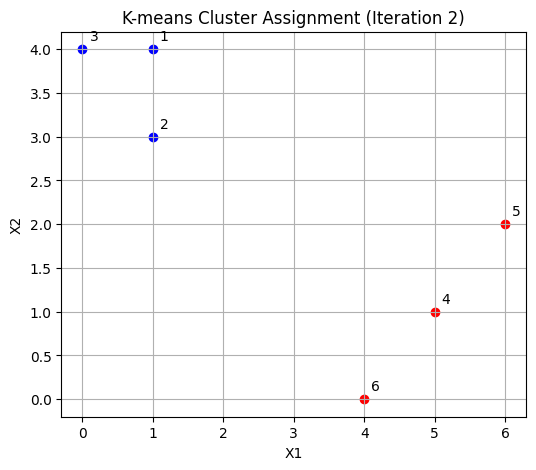

In [8]:
new_labels2 = [2, 2, 2, 1, 1, 1]

plt.figure(figsize=(6, 5))
for i, (x, y, lbl) in enumerate(zip(X1, X2, new_labels2), start=1):
    plt.scatter(x, y, c='red' if lbl == 1 else 'blue')
    plt.text(x + 0.1, y + 0.1, str(i))

plt.title("K-means Cluster Assignment (Iteration 2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

**4. Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.**

**(a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?**

In hierarchical clustering, the height at which two clusters merge in a dendrogram depends on the linkage criterion used. **Single linkage** measures the distance between two clusters as the minimum distance between any pair of points in the two clusters, whereas **complete linkage** measures the distance as the maximum distance between any pair of points.

Because complete linkage considers the largest distance between points in different clusters, it is always **greater than or equal to** the minimum distance used in single linkage. Therefore, when fusing clusters {1, 2, 3} and {4, 5}, the distance triggering the fusion in complete linkage will be at least as large as in single linkage. As a result, the fusion of these clusters in the complete linkage dendrogram will occur **higher on the tree** than in the single linkage dendrogram. This reflects that complete linkage tends to produce more compact, tight clusters, whereas single linkage can fuse clusters based on a single close pair of points.

**(b) At a certain point on the single linkage dendrogram, the clusters {5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?**

In this case, each cluster contains only **a single point**: {5} and {6}. For clusters with only one element each, the single linkage distance and the complete linkage distance are **the same**, because there is only one pair of points to measure the distance between.

Therefore, the fusion of {5} and {6} will occur at the **same height** in both the single linkage and complete linkage dendrograms.

**5. In words, describe the results that you would expect if you performed K-means clustering of the eight shoppers in Figure 12.16, on the basis of their sock and computer purchases, with $K = 2$. Give three answers, one for each of the variable scalings displayed. Explain.**

**a. Raw counts (left plot):**
In the raw scale, the computer purchases are all very small (0 or 1), while sock purchases vary widely (from 5 to 10). Since K-means clustering is based on Euclidean distance, variables with larger numerical ranges dominate the distance calculation. Here, the sock purchases dominate. Therefore, the clustering will primarily separate shoppers based on the number of socks they bought, largely ignoring the differences in computer purchases. Likely, one cluster will contain shoppers with lower sock purchases, and the other cluster will contain those with higher sock purchases.

**b. Range-standardized (middle plot):**
Range-standardization scales each variable to fall between 0 and 1. Now, both sock and computer purchases contribute equally to the clustering, as differences are measured relative to each variable’s range. The clusters will reflect a combination of sock and computer purchase patterns. Shoppers with high purchases in both categories will be grouped together, while those with low purchases in both categories form the other cluster. Shoppers who are high in one category but low in the other may end up assigned based on which variable has relatively larger scaled differences.

**c. Standard deviation-standardized (right plot):**
Here, each variable is centered and scaled by its standard deviation. Since computer purchases have extremely low variance (all values are nearly identical), standardization inflates the differences among them relative to their tiny variance. Sock purchases, which vary more, are scaled down relative to their standard deviation. This scaling will make even small differences in computer purchases dominate the clustering. As a result, K-means may primarily separate shoppers based on tiny differences in computer purchases rather than sock purchases, essentially flipping the focus compared to the raw-count clustering.

In summary, **the clustering result depends strongly on the variable scaling**: raw counts emphasize the high-variance variable (socks), range-standardization balances contributions from both variables, and standard deviation-standardization emphasizes variables with very low variance (computers in this case).

**6. We saw in Section 12.2.2 that the principal component loading and score vectors provide an approximation to a matrix, in the sense of (12.5). Specifically, the principal component score and loading vectors solve the optimization problem given in (12.6).**

**Now, suppose that the $M$ principal component score vectors $z_{im}$, $m = 1, ..., M$, are known. Using (12.6), explain that each of the first $M$ principal component loading vectors $\phi_{jm}$ , $m = 1, ..., M$, can be obtained by performing $p$ separate least squares linear regressions. In each regression, the principal component score vectors are the predictors, and one of the features of the data matrix is the response.**

$$
X \approx Z \Phi^T
$$

where:

* $Z$ is the $n \times M$ matrix of principal component **scores** $z_{im}$,
* $\Phi$ is the $p \times M$ matrix of principal component **loadings** $\phi_{jm}$.

Now, suppose that the **score vectors $z_{im}$ for $m = 1, \dots, M$ are already known**. Then the problem of finding the loadings $\phi_{jm}$ simplifies.

From the matrix approximation viewpoint, for a single feature $j$ (i.e., the $j$-th column of $X$), we want to approximate $x_j$ as a linear combination of the $M$ known scores:

$$
x_j \approx \sum_{m=1}^{M} z_m \phi_{jm}
$$

where:

* $x_j$ is the $n \times 1$ vector of observations for feature $j$,
* $z_m$ is the $n \times 1$ vector of the $m$-th principal component scores,
* $\phi_{jm}$ is the loading of feature $j$ on the $m$-th component.

Notice the structure: this is **exactly a multiple linear regression** problem:

* The **response variable** is $x_j$ (one column of $X$),
* The **predictors** are the known score vectors $z_1, z_2, \dots, z_M$,
* The **regression coefficients** are the loadings $\phi_{j1}, \dots, \phi_{jM}$.

Thus, for each of the $p$ features (columns of $X$), we can perform a **least squares regression** of that feature on the $M$ principal component scores to obtain the corresponding row of the loading matrix $\Phi$.

Repeating this for all $j = 1, \dots, p$ gives the full $p \times M$ loading matrix.

If the principal component scores are known, the loading of each feature on the components can be computed by regressing that feature on the known scores. Each regression provides one row of the loading matrix, and performing this for all features recovers the complete loading matrix.